In [64]:
from qiskit.quantum_info import random_statevector
from qiskit import QuantumCircuit
import numpy as np

###
# posso inizializzare solo random 
# state = random_statevector(4) # note: the parameter you pass is the number of entries in the vector, not the number of qubits
# qc.initialize(state.data, [0,1])

exact_covers = ["1000010000", "0010011000","0010010110","0000110100"] 

nrows = len(exact_covers)
ncols = len(exact_covers[0])
mat = np.zeros(shape=(nrows, ncols))
print(np.shape(mat))
for x,state in enumerate(exact_covers):
    for y,bit in enumerate(state):
        mat[x][y] = bit
        
mat = np.array(mat)
print(mat)
# for i, bit in enumerate("010"):
#     qc.initialize(bit, i)

# for y in range(ncols):
res = np.all(mat == mat[0,:], axis = 0)
print(res)
fixed_qubits = list(np.where(res == True)[0])
# fixed_qubits = [int(x) for x in fixed_qubits ]
print("fixed_qubits", fixed_qubits)
# i qubit da fissare a un valore costante


l = np.array([x[~res] for x in mat])
mat = mat.T
d = {k:v for k,v in enumerate(mat)}
l = l.T
print("mat", mat)
print("l", l)
print(d)

new_d = {k:v for k,v in d.items() if k not in fixed_qubits}

print(new_d)

(4, 10)
[[1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 1. 1. 0.]
 [0. 0. 0. 0. 1. 1. 0. 1. 0. 0.]]
[False  True False  True False  True False False False  True]
fixed_qubits [1, 3, 5, 9]
mat [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 1. 1. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]
l [[1. 0. 0. 0.]
 [0. 1. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 1. 0.]]
{0: array([1., 0., 0., 0.]), 1: array([0., 0., 0., 0.]), 2: array([0., 1., 1., 0.]), 3: array([0., 0., 0., 0.]), 4: array([0., 0., 0., 1.]), 5: array([1., 1., 1., 1.]), 6: array([0., 1., 0., 0.]), 7: array([0., 0., 1., 1.]), 8: array([0., 0., 1., 0.]), 9: array([0., 0., 0., 0.])}
{0: array([1., 0., 0., 0.]), 2: array([0., 1., 1., 0.]), 4: array([0., 0., 0., 1.]), 6: array([0., 1., 0., 0.]), 7: array([0., 0., 1., 1.]), 8: array([0., 0., 1., 0.])}


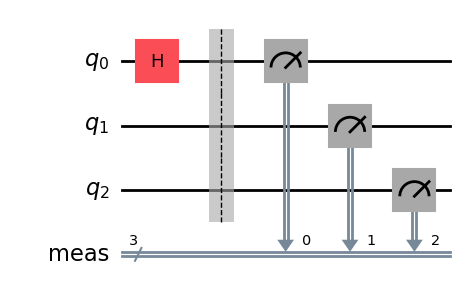

In [21]:
num_qubits = 3
qc = QuantumCircuit(num_qubits)

qc.h(0)
qc.measure_all()
qc.draw('mpl')